In [1]:
from markup_predict import hand_mark_boxes, detection_scores, detection_scores_in_roi, show_rectangles

In [2]:
data_path ='C:\\my_cv_work\\tpe_recognition\\data\\cam_1_hand_markup'
source_path = 'D:\\data\\pics\\cam_1_src'
data_filename = 'cam_1_hand_markup_next.json'

In [3]:
#hand_mark_boxes(source_path, data_path, data_filename)

In [4]:
import json
import os

In [5]:
data  = json.loads(open(os.path.join(data_path,data_filename), 'r').read())

In [6]:
markup_path = 'C:\\my_cv_work\\tpe_recognition\\data\\cam_1_serial_markup'

In [7]:
ground_truth = { k:v for k,v in data.items() if v['n_boxes'] > 0}

In [8]:
with open(os.path.join(markup_path, 'gt_markup.json'), 'w') as outfile:
    json.dump(ground_truth, outfile)

In [9]:
import numpy as np

In [10]:
thresholds = np.linspace(0.1, 0.9, 9)

In [11]:
markup_files = [f for f in os.listdir(markup_path) if f.endswith('.json')]

In [12]:
scores = []
for threshold in thresholds:
    for file in markup_files:
        if str(threshold) in file:
            precision, recall, HITS_TOT, NO_TOT, NR_TOT = detection_scores(os.path.join(markup_path, 'gt_markup.json'), os.path.join(markup_path, file))
            scores.append({'threshold': threshold,
                           'precision': precision,
                           'recall': recall,
                           'hits': HITS_TOT,
                           'number of detections': NO_TOT,
                           'number of relevant objects': NR_TOT})
            

In [13]:
#scores

In [14]:
prec_x = []
rec_y = []
for s in scores:
    prec_x.append(s['precision'])
    rec_y.append(s['recall'])

In [15]:
% matplotlib inline

In [16]:
import matplotlib.pyplot as plt

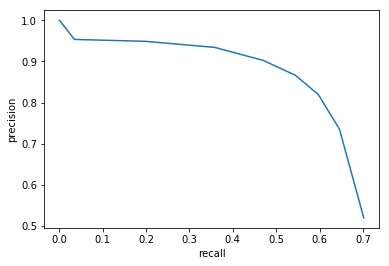

In [17]:
fig, ax = plt.subplots()
ax.plot(rec_y, prec_x)
ax.set_xlabel('recall')
ax.set_ylabel('precision')
plt.show()
fig.savefig('c:/my_cv_work/fig1.png')

In [19]:
rec_y

[0.7015849430411094,
 0.6456166419019317,
 0.5968301139177811,
 0.5440812283308568,
 0.47052996532937097,
 0.35809806835066865,
 0.19737493808816245,
 0.0354135710747895,
 0.0007429420505200594]

In [18]:
from sklearn.metrics import auc

In [19]:
auc(rec_y, prec_x)

0.62497630274505389

In [20]:
import cv2

In [21]:
img_file = os.listdir(source_path)[0]
img = cv2.imread(os.path.join(source_path,img_file))
x,y,w,h = cv2.selectROI(img)
x1,y1,x2,y2 = x,y,x+w,y+h
img = img[y1:y2, x1:x2, :]
cv2.imshow('i',img)
cv2.waitKey()
cv2.destroyAllWindows()
print(x1,y1,x2,y2)

388 195 679 573


In [22]:
roi = (343,131,877,668)

In [23]:
scores_roi = []
for threshold in thresholds:
    for file in markup_files:
        if str(threshold) in file:
            precision, recall, HITS_TOT, NO_TOT, NR_TOT = detection_scores_in_roi(os.path.join(markup_path, 'gt_markup.json'), os.path.join(markup_path, file), roi)
            scores_roi.append({'threshold': threshold,
                           'precision': precision,
                           'recall': recall,
                           'hits': HITS_TOT,
                           'number of detections': NO_TOT,
                           'number of relevant objects': NR_TOT})

In [24]:
#scores_roi

In [25]:
prec_roi = []
rec_roi = []
for s in scores_roi:
    prec_roi.append(s['precision'])
    rec_roi.append(s['recall'])

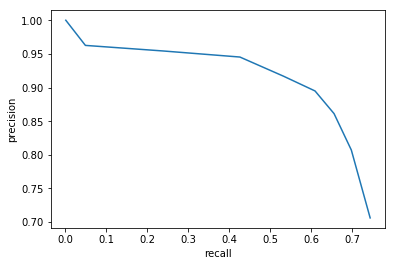

In [26]:
fig, ax = plt.subplots()
ax.plot(rec_roi, prec_roi)
ax.set_xlabel('recall')
ax.set_ylabel('precision')
plt.show()
fig.savefig('c:/my_cv_work/fig1.png')

In [27]:
auc(rec_roi, prec_roi)

0.68620136568310119

In [30]:
root_path = 'D:\\data\\pics\\cam_1_src_markup_darknet'
source_path = 'D:\\data\\pics\\cam_1_src'
for file in markup_files:
    saving_dir = os.path.join(root_path, file)
    if not os.path.exists(saving_dir):
        os.mkdir(saving_dir)
    show_rectangles(os.path.join(markup_path, 'gt_markup.json'),
                    os.path.join(markup_path, file),
                    source_path,
                    saving_dir,
                    (343,131,877,668), iou_threshold=0.5)

ZeroDivisionError: division by zero